In [1]:
import os
import inspect
import logging
from src import utils


# __file__ is usually defined, but not in interactive environments like this
__file__ = inspect.getfile(inspect.currentframe())

# Set up the logger
logger = logging.getLogger(os.path.basename(__file__))
logger = utils.logging.configure_logger(logger)

<ipython-input-1-f190f48d2d0e> | DEBUG    | 2019-04-12 16:29:16,687        |                  Added modified stream handler to logger.


In [2]:
from src.models import GTLibraryGridWarehouse
from tsp import held_karp as tsp_help_karp
import numpy as np

models.py    | DEBUG    | 2019-04-12 16:29:17,937        |                                          Added modified stream handler to logger.


In [4]:
# Load the warehouse object from the JSON file
gt_library_warehouse = GTLibraryGridWarehouse.from_file('data/warehouse.json')

books_per_pick_path = 10

logger.debug('Choosing %d books at random.' % books_per_pick_path)
unordered_books = np.random.choice(
    a=gt_library_warehouse.books,
    size=books_per_pick_path,
    replace=False,
)

unordered_books_locations = gt_library_warehouse.get_locations_of_books(unordered_books)

logger.debug('Getting sub-graph on chosen book locations and source for TSP.')
# If two books are on the same column, this method will consider them the same cell,
# This is why we'll need reintroduce_duplicate_column_locations later
G_subgraph = gt_library_warehouse.get_subgraph_on_book_locations(unordered_books_locations)

logger.debug('Solving TSP for selected books.')
optimal_pick_path, optimal_cost = tsp_help_karp.solver(G_subgraph, gt_library_warehouse.source_cell)

logger.debug('Patching up solution.')
ordered_books, ordered_locations = gt_library_warehouse.reintroduce_duplicate_column_locations(
    zip(unordered_books, unordered_books_locations), optimal_pick_path)

# The optimal pick path has two more source locations (source, ..., source)
assert len(unordered_books) == len(ordered_books) - 2 == len(ordered_locations) - 2

logger.debug('Computing cell-by-cell pick path in library based on TSP solution.')
optimal_pick_path_in_library = gt_library_warehouse.get_pick_path_in_library(ordered_locations)

logger.debug('Verifying solution has right format and cost.')
utils.assertions.assert_library_pick_path_is_proper(
    optimal_pick_path_in_library, ordered_locations, gt_library_warehouse.source_cell)
utils.assertions.assert_library_pick_path_has_cost(
    optimal_pick_path_in_library, optimal_cost, len(ordered_books[1:-1]))

logger.debug('Packaging solution in dictionary.')
d = gt_library_warehouse.get_pick_path_as_dict(
    unordered_books,
    unordered_books_locations,
    ordered_books,
    ordered_locations,
    optimal_pick_path_in_library,
)



<ipython-input-1-f190f48d2d0e> | DEBUG    | 2019-04-12 16:29:31,829        |                              Choosing 10 books at random.


<ipython-input-1-f190f48d2d0e> | DEBUG    | 2019-04-12 16:29:31,852        |                              Getting sub-graph on chosen book locations and source for TSP.


<ipython-input-1-f190f48d2d0e> | DEBUG    | 2019-04-12 16:29:31,950        |                              Solving TSP for selected books.


<ipython-input-1-f190f48d2d0e> | DEBUG    | 2019-04-12 16:29:32,048        |                              Patching up solution.


<ipython-input-1-f190f48d2d0e> | DEBUG    | 2019-04-12 16:29:32,055        |                              Computing cell-by-cell pick path in library based on TSP solution.


models.py    | DEBUG    | 2019-04-12 16:29:32,107        |                                      Shortcutting path with 13 cells.


models.py    | DEBUG    | 2019-04-12 16:29:34,668        |                                      Path now has 13 cells.


models.py    | DEBUG    | 2019-04-12 16:29:34,675        |                                      Shortcutting path with 19 cells.


models.py    | DEBUG    | 2019-04-12 16:29:38,422        |                                      Path now has 19 cells.


models.py    | DEBUG    | 2019-04-12 16:29:38,428        |                                      Shortcutting path with 3 cells.


models.py    | DEBUG    | 2019-04-12 16:29:38,435        |                                      Path now has 3 cells.


models.py    | DEBUG    | 2019-04-12 16:29:38,450        |                                      Shortcutting path with 22 cells.


models.py    | DEBUG    | 2019-04-12 16:29:39,558        |                                      Path now has 22 cells.


models.py    | DEBUG    | 2019-04-12 16:29:39,569        |                                      Shortcutting path with 3 cells.


models.py    | DEBUG    | 2019-04-12 16:29:39,582        |                                      Path now has 3 cells.


models.py    | DEBUG    | 2019-04-12 16:29:39,593        |                                      Shortcutting path with 6 cells.


models.py    | DEBUG    | 2019-04-12 16:29:39,615        |                                      Path now has 6 cells.


models.py    | DEBUG    | 2019-04-12 16:29:39,638        |                                      Shortcutting path with 22 cells.


models.py    | DEBUG    | 2019-04-12 16:29:41,860        |                                      Path now has 22 cells.


models.py    | DEBUG    | 2019-04-12 16:29:41,865        |                                      Shortcutting path with 6 cells.


models.py    | DEBUG    | 2019-04-12 16:29:42,105        |                                      Path now has 6 cells.


models.py    | DEBUG    | 2019-04-12 16:29:42,111        |                                      Shortcutting path with 6 cells.


models.py    | DEBUG    | 2019-04-12 16:29:42,338        |                                      Path now has 6 cells.


models.py    | DEBUG    | 2019-04-12 16:29:42,346        |                                      Shortcutting path with 9 cells.


models.py    | DEBUG    | 2019-04-12 16:29:43,392        |                                      Path now has 9 cells.


models.py    | DEBUG    | 2019-04-12 16:29:43,397        |                                      Shortcutting path with 20 cells.


models.py    | DEBUG    | 2019-04-12 16:29:50,002        |                                      Path now has 20 cells.


<ipython-input-1-f190f48d2d0e> | DEBUG    | 2019-04-12 16:29:50,008        |                              Verifying solution has right format and cost.


<ipython-input-1-f190f48d2d0e> | DEBUG    | 2019-04-12 16:29:50,014        |                              Packaging solution in dictionary.


In [7]:
from src import viz
import json


with open('pick-paths.json', mode='r') as f:
    pick_path_data = json.load(f)

PICK_PATH_FILE_FORMAT_VERSION = '2.0'

assert pick_path_data['version'] == PICK_PATH_FILE_FORMAT_VERSION

pick_path = pick_path_data['pickPaths'][0]

path = viz.renderer.render_gt_library_grid_warehouse(gt_library_warehouse, pick_path=pick_path)


renderer.py  | INFO     | 2019-04-12 16:29:57,913        |                  Starting render...


renderer.py  | DEBUG    | 2019-04-12 16:29:57,935        |                  Cleared previous elements from canvas.


renderer.py  | DEBUG    | 2019-04-12 16:29:57,953        |                  Drew column lines.


renderer.py  | DEBUG    | 2019-04-12 16:29:57,974        |                  Drew row lines.


renderer.py  | DEBUG    | 2019-04-12 16:29:57,998        |                  Drew all cells with appropriate colors.


renderer.py  | DEBUG    | 2019-04-12 16:29:58,053        |                  Drew chevron and path direction lines.


renderer.py  | DEBUG    | 2019-04-12 16:29:58,068        |                  Drew target books.


renderer.py  | DEBUG    | 2019-04-12 16:29:58,089        |                  Drew pick path.


renderer.py  | DEBUG    | 2019-04-12 16:29:58,110        |                  Drew title.


renderer.py  | INFO     | 2019-04-12 16:29:58,350        |                  Finished render.


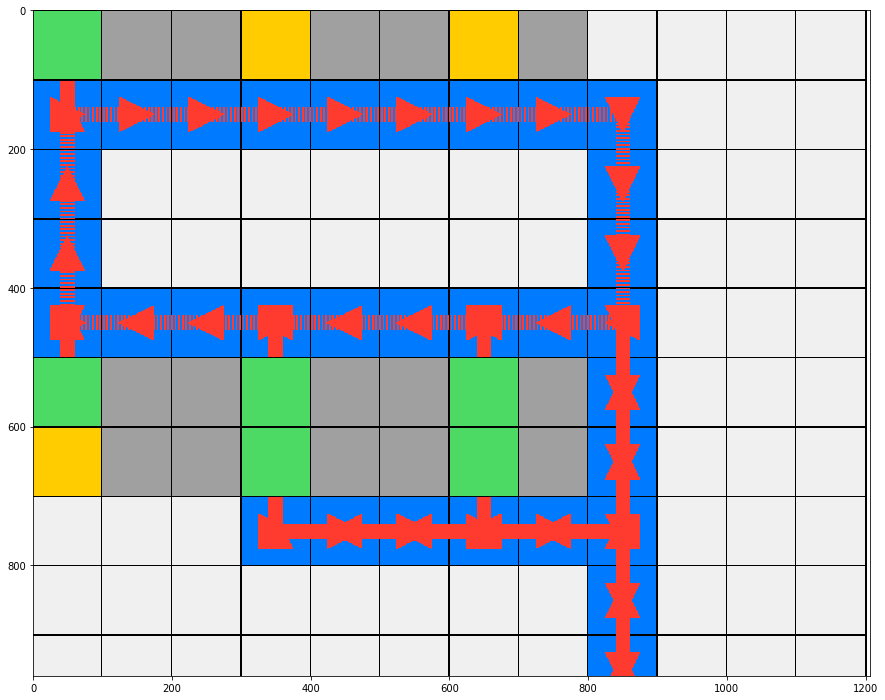

In [8]:
# https://pages.uoregon.edu/koch/

%matplotlib inline
# from src import viz
# viz.show.image(path)

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

im = mpimg.imread(path)
height, width = im.shape[:2]
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(im)